#  K-means

In [10]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import json # library to handle JSON files

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

print('Libraries imported.')

Libraries imported.


In [3]:
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]

centers=[[4, 4], [-2, -1], [2, -3], [1, 1]]

x1 = [1, 2, 13, 14]
x2 = [2, 4, 13, 14]
centers=[[5, 13], [3, 6]]

colors_map = np.array(['b', 'r'])

print('x1', x1)
print('x2', x2)
print('centers', centers)

print()
print('colors_map', list(colors_map))
         
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    print('\nclass_of_points', class_of_points, '\nclass_of_points + 1 - 1:', class_of_points + 1 - 1)
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

print('assign_members function defined!')



colors, class_of_points = assign_members(x1, x2, centers)

compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
class_of_points = compare_to_first_center > compare_to_second_center
   
print('\n====================================================================================')
print('x1:', x1, 'center[0,0]:', centers[0][0])
print('x1-center[0,0]:', np.array(x1), '-', centers[0][0])
print('x1-center[0,0]:', np.array(x1) - centers[0][0])

print()
print('x2:', x2, 'center[0,1]:', centers[0][1])
print('x2-center[0,1]:', np.array(x2), '-', centers[0][1])
print('x2-center[0,1]:', np.array(x2) - centers[0][1])
print(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
print([round(elem, 2) for elem in compare_to_first_center])
print('class_of_points + 1 - 1:', class_of_points + 1 - 1)

print('\n====================================================================================')
print('x1:', x1, 'center[1,0]:', centers[1][0])
print('x1-center[1,0]:', np.array(x1), '-', centers[1][0])
print('x1-center[1,0]:', np.array(x1) - centers[1][0])

print()
print('x2:', x2, 'center[1,1]:', centers[1][1])
print('x2-center[1,1]:', np.array(x2), '-', centers[1][1])
print('x2-center[1,1]:', np.array(x2) - centers[1][1])
print(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
print([round(elem, 2) for elem in compare_to_second_center])
print('class_of_points + 1 - 1:', class_of_points + 1 - 1)

print('\n====================================================================================')
print('colors', colors, 'class_of_points', class_of_points)
print('\n====================================================================================')


x1 [1, 2, 13, 14]
x2 [2, 4, 13, 14]
centers [[5, 13], [3, 6]]

colors_map ['b', 'r']
assign_members function defined!

class_of_points [ True  True False False] 
class_of_points + 1 - 1: [1 1 0 0]

x1: [1, 2, 13, 14] center[0,0]: 5
x1-center[0,0]: [ 1  2 13 14] - 5
x1-center[0,0]: [-4 -3  8  9]

x2: [2, 4, 13, 14] center[0,1]: 13
x2-center[0,1]: [ 2  4 13 14] - 13
x2-center[0,1]: [-11  -9   0   1]
[137  90  64  82]
[11.7, 9.49, 8.0, 9.06]
class_of_points + 1 - 1: [1 1 0 0]

x1: [1, 2, 13, 14] center[1,0]: 3
x1-center[1,0]: [ 1  2 13 14] - 3
x1-center[1,0]: [-2 -1 10 11]

x2: [2, 4, 13, 14] center[1,1]: 6
x2-center[1,1]: [ 2  4 13 14] - 6
x2-center[1,1]: [-4 -2  7  8]
[ 20   5 149 185]
[4.47, 2.24, 12.21, 13.6]
class_of_points + 1 - 1: [1 1 0 0]

colors ['r' 'r' 'b' 'b'] class_of_points [ True  True False False]



# update centroids

In [74]:
# update means
def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

print('assign_members function defined!')

update_centers(x1, x2, class_of_points)


assign_members function defined!


[[13.5, 13.5], [1.5, 3.0]]

# plot

In [75]:
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=40, c=colors)
    
    # define the ticks
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function defined!')

plot_points function defined!


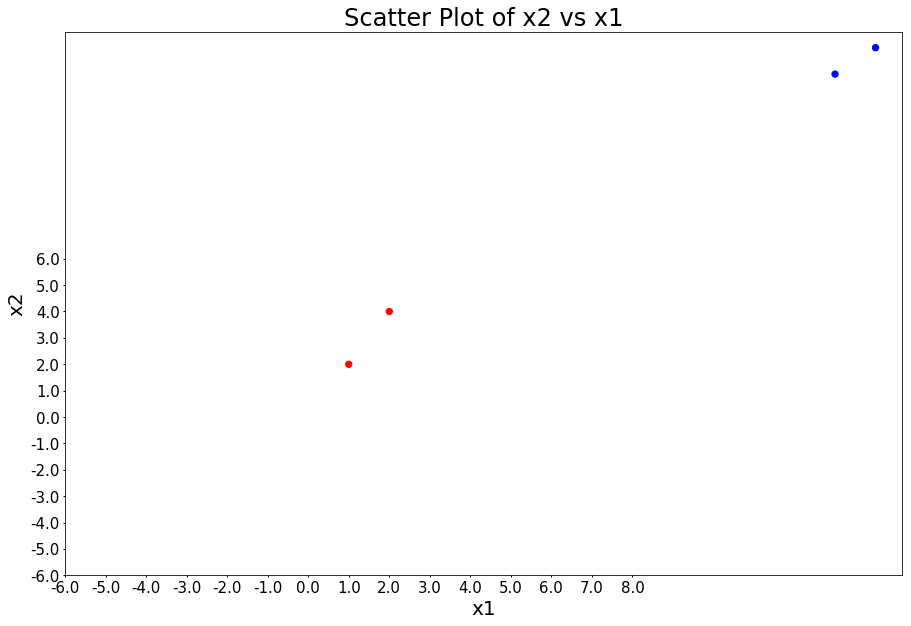

In [76]:
plot_points(figure_title='Scatter Plot of x2 vs x1', colors=colors)

In [59]:
pd.DataFrame(np.linspace(1, 15, 15, endpoint=True)).transpose() #endpoint (define if include or not boundary value)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0


In [60]:
pd.DataFrame([round(elem, 2) for elem in np.linspace(1, 15, 15, endpoint=False)]).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,1.93,2.87,3.8,4.73,5.67,6.6,7.53,8.47,9.4,10.33,11.27,12.2,13.13,14.07


In [82]:
colors = plt.cm.Spectral(np.linspace(0, 10, 5))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

# df.append
Define new DataFrame e convert json in DataFrame

In [9]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

print('print(newyork_data[''features''][0])')    
print(newyork_data['features'][0])

neighborhoods_data = newyork_data['features']

print()
print('neighborhoods_data[0])')
print(neighborhoods_data[0])

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)


for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
neighborhoods.head()

Data downloaded!
print(newyork_data[features][0])
{'type': 'Feature', 'id': 'nyu_2451_34572.1', 'geometry': {'type': 'Point', 'coordinates': [-73.84720052054902, 40.89470517661]}, 'geometry_name': 'geom', 'properties': {'name': 'Wakefield', 'stacked': 1, 'annoline1': 'Wakefield', 'annoline2': None, 'annoline3': None, 'annoangle': 0.0, 'borough': 'Bronx', 'bbox': [-73.84720052054902, 40.89470517661, -73.84720052054902, 40.89470517661]}}

neighborhoods_data[0])
{'type': 'Feature', 'id': 'nyu_2451_34572.1', 'geometry': {'type': 'Point', 'coordinates': [-73.84720052054902, 40.89470517661]}, 'geometry_name': 'geom', 'properties': {'name': 'Wakefield', 'stacked': 1, 'annoline1': 'Wakefield', 'annoline2': None, 'annoline3': None, 'annoangle': 0.0, 'borough': 'Bronx', 'bbox': [-73.84720052054902, 40.89470517661, -73.84720052054902, 40.89470517661]}}


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


# Convert address 2 location

In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


# StandardScaler

In [3]:
from sklearn.preprocessing import StandardScaler

data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print('scaler.fit(data)', scaler.fit(data))

StandardScaler()
print('scaler.mean_', scaler.mean_)
print(scaler.transform(data))

print(scaler.transform([[2, 2]]))


scaler.fit(data) StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.mean_ [0.5 0.5]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[3. 3.]]


# makeblobs

In [6]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10, centers=3, n_features=2,
                  random_state=0)

print('X.shape:', X.shape, 'y:', y)

X, y = make_blobs(n_samples=[3, 3, 4], centers=None, n_features=2,
                  random_state=0)

print('X.shape:', X.shape, 'y:', y)

X.shape: (10, 2) y: [0 0 1 0 2 2 2 1 1 0]
X.shape: (10, 2) y: [0 1 2 0 2 2 2 1 1 0]
